# Visualizando con t-SNE

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import funciones as mifu

In [4]:
sujeto = 1
datos = mifu.extraer(sujeto)
datos_ordenados = mifu.ordenar(datos)
datos_normalizados = mifu.normalizar(datos_ordenados)

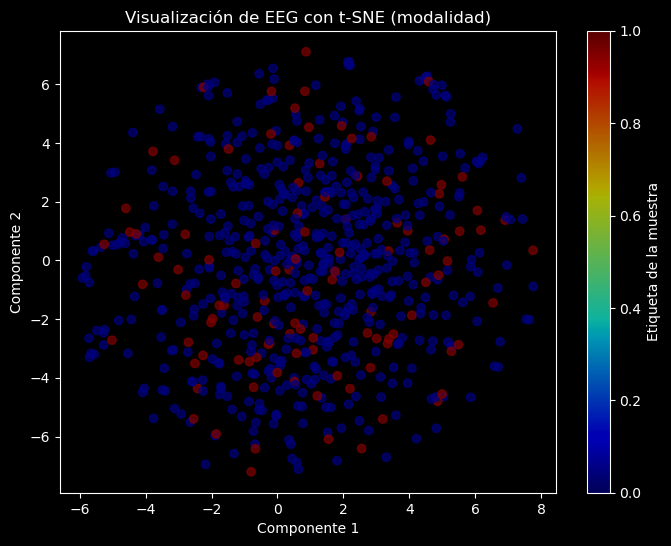

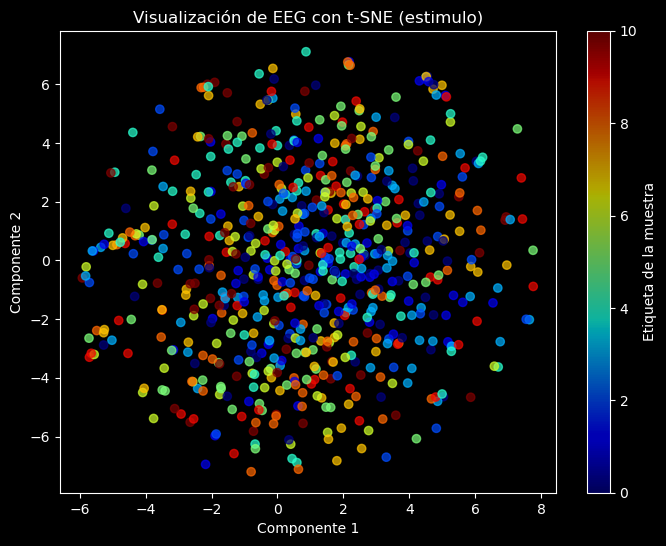

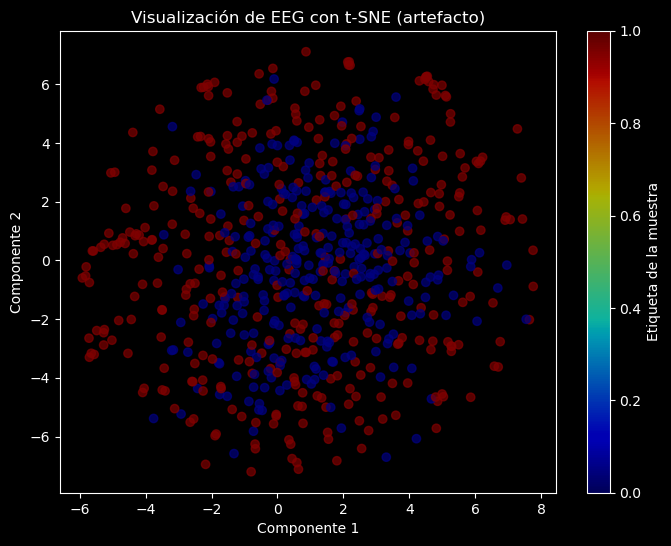

In [16]:
tsne = TSNE(n_components = 2, perplexity = 30, random_state = 17, learning_rate = 200)
X_embedded = tsne.fit_transform(datos_normalizados[0])

plt.figure(figsize=(8, 6))
plt.style.use('dark_background')
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = datos_normalizados[1][:, 0] - 1, cmap = 'jet', alpha = 0.7)
plt.colorbar(label="Etiqueta de la muestra")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Visualización de EEG con t-SNE (modalidad)")
plt.show()

plt.figure(figsize=(8, 6))
plt.style.use('dark_background')
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = datos_normalizados[1][:, 1] - 1, cmap = 'jet', alpha = 0.7)
plt.colorbar(label="Etiqueta de la muestra")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Visualización de EEG con t-SNE (estimulo)")
plt.show()

plt.figure(figsize=(8, 6))
plt.style.use('dark_background')
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = datos_normalizados[1][:, 2] - 1, cmap = 'jet', alpha = 0.7)
plt.colorbar(label="Etiqueta de la muestra")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Visualización de EEG con t-SNE (artefacto)")
plt.show()

Vemos que no se logran separar los grupos para ninguna de las etiquetas.

In [18]:
fs = 1024
tam_f = 33
ventana_temporal = 512
datos_stft = mifu.convertir_a_stft(datos_ordenados, fs, 'hann', ventana_temporal, ventana_temporal/2)
datos_stft[0] = datos_stft[0][:, :, :tam_f, :]

datos_aplanados = np.empty((datos_stft[0].shape[0], datos_stft[0].shape[1]*datos_stft[0].shape[2]*datos_stft[0].shape[3])).astype(np.complex128())
aux = np.empty((datos_stft[0].shape[0], datos_stft[0].shape[1], datos_stft[0].shape[2]*datos_stft[0].shape[3])).astype(np.complex128())
for i in range(datos_stft[0].shape[0]):
    for j in range(datos_stft[0].shape[1]):
        aux[i][j] = np.concatenate(datos_stft[0][i][j].T)
for i in range(aux.shape[0]):
    datos_aplanados[i] = np.concatenate(aux[i])
datos_aplanados = [datos_aplanados, datos_stft[1]]
datos_aplanados = [np.abs(datos_aplanados[0]), datos_aplanados[1]]

datos_normalizados1 = mifu.normalizar(datos_aplanados)

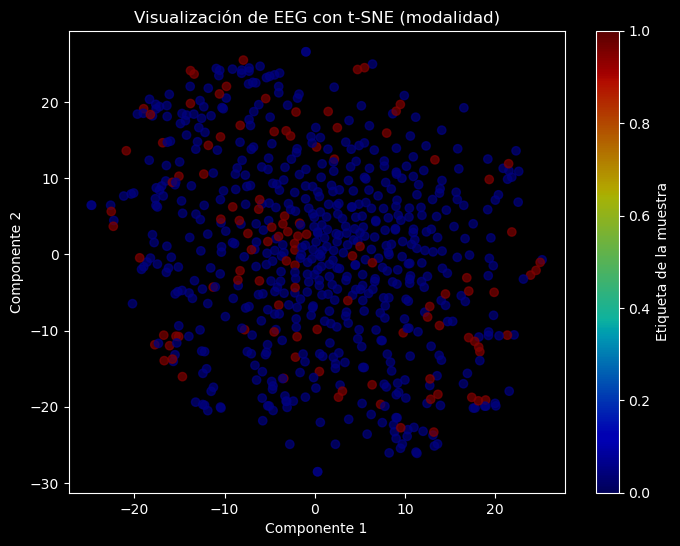

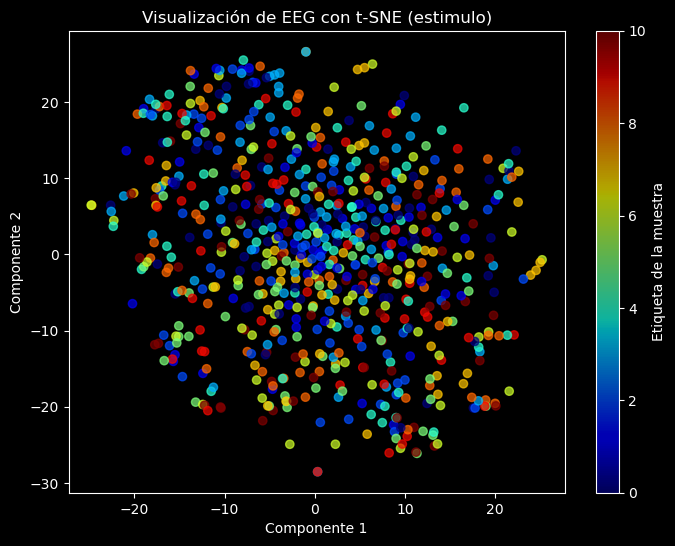

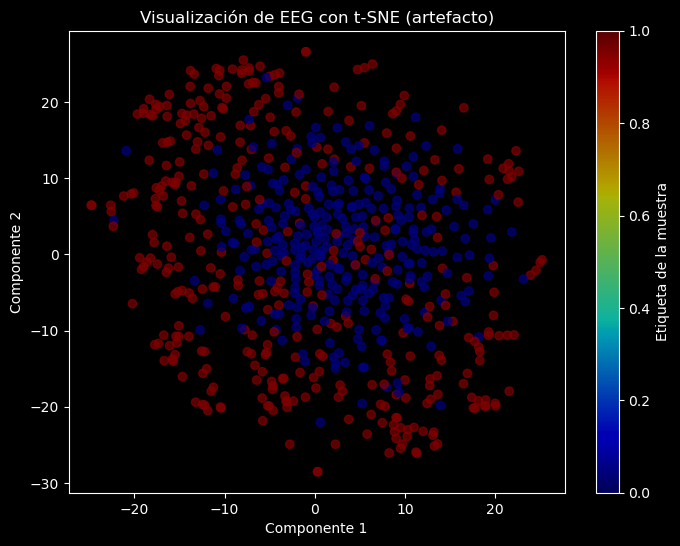

In [28]:
tsne = TSNE(n_components = 2, perplexity = 30, random_state = 17, learning_rate = 200, method = 'exact') # Ni cambiando el metodo al exacto se mejora la visualizacion
X_embedded1 = tsne.fit_transform(datos_normalizados1[0])

plt.figure(figsize=(8, 6))
plt.style.use('dark_background')
scatter = plt.scatter(X_embedded1[:, 0], X_embedded1[:, 1], c = datos_normalizados1[1][:, 0] - 1, cmap = 'jet', alpha = 0.7)
plt.colorbar(label="Etiqueta de la muestra")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Visualización de EEG con t-SNE (modalidad)")
plt.show()

plt.figure(figsize=(8, 6))
plt.style.use('dark_background')
scatter = plt.scatter(X_embedded1[:, 0], X_embedded1[:, 1], c = datos_normalizados1[1][:, 1] - 1, cmap = 'jet', alpha = 0.7)
plt.colorbar(label="Etiqueta de la muestra")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Visualización de EEG con t-SNE (estimulo)")
plt.show()

plt.figure(figsize=(8, 6))
plt.style.use('dark_background')
scatter = plt.scatter(X_embedded1[:, 0], X_embedded1[:, 1], c = datos_normalizados1[1][:, 2] - 1, cmap = 'jet', alpha = 0.7)
plt.colorbar(label="Etiqueta de la muestra")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Visualización de EEG con t-SNE (artefacto)")
plt.show()

Hay una ligera mejora, mas que nada visible en modalidad y artefacto